# Analysing Tabular Data with Pandas
## Italy Covid Day-wise Data

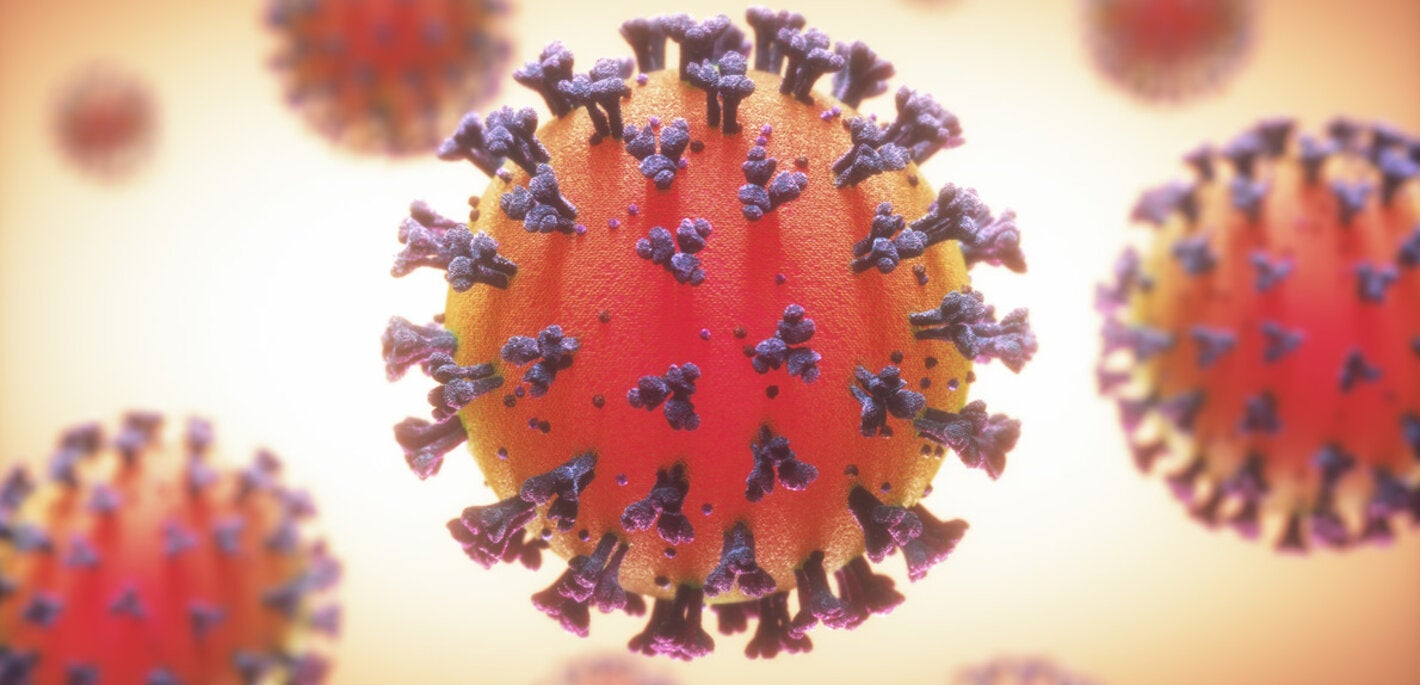

We will download this file using urlretrieve function from thise urllib.request module

In [1]:
from urllib.request import urlretrieve

In [2]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'
urlretrieve(italy_covid_url,"italy-covid-daywise.csv")

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x15f9c5afac8>)

In [4]:
import pandas as pd

In [5]:
covid_df = pd.read_csv("italy-covid-daywise.csv")

In [6]:
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


-The file provides four day-wise counts for covid-19 in italy 

-Data is provides for 248 days: from Dec12,2019 tp Sep 23,2020

-The metrics reported are new cases,new deaths and neww tests

In [9]:
covid_df.info()# Basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [11]:
covid_df.describe() # only for numerical columns

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [12]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [13]:
covid_df.shape

(248, 4)

In [14]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [18]:
covid_df['new_cases'][243]

1444.0

In [19]:
covid_df.at[243,'new_cases']

1444.0

In [20]:
cases_df= covid_df[['date','new_cases']] # access multiple columns 
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [22]:
covid_df.loc[243] # retrive record at given index

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [24]:
covid_df.loc[243:255] # retrive multiple records

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [26]:
covid_df.sample(5)

,date,new_cases,new_deaths,new_tests
138,2020-05-17,875.0,153.0,33505.0
224,2020-08-11,259.0,4.0,22063.0
89,2020-03-29,5974.0,887.0,NaN
245,2020-09-01,996.0,6.0,54395.0
13,2020-01-13,0.0,0.0,NaN


In [33]:
covid_df.new_tests.first_valid_index # find first empty index

<bound method NDFrame.first_valid_index of 0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
243    53541.0
244    42583.0
245    54395.0
246        NaN
247        NaN
Name: new_tests, Length: 248, dtype: float64>

# Analyzing Data from data frames

### Q: what are the total number of reported cases and deaths related to covid-19 in italy?

In [38]:
total_cases = covid_df['new_cases'].sum()
total_deaths = covid_df.new_deaths.sum()


In [42]:
print("The number of reported cases is {} and the number of reported deaths is {}".format(total_cases,total_deaths))

The number of reported cases is 271515.0 and the number of reported deaths is 35497.0


### Q: what is overall death rate(ratio of reported deaths to reported cases)? 

In [51]:
death_rate = total_deaths/total_cases

In [53]:
print("The overall death rate in Italy is {:.2f}% ".format(death_rate*100))

The overall death rate in Italy is 13.07% 


### Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.

In [54]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [55]:
print("total_tests are {}".format(total_tests))

total_tests are 5214766.0


### Q: What fraction of tests returned a positive result?



In [56]:
positive_rate = total_cases/total_tests


In [59]:
print("{:.2f}% of tests in italy led to a positive diagnosis.".format(positive_rate*100))

5.21% of tests in italy led to a positive diagnosis.


# Querying and Sorting rows

In [66]:
covid_df[covid_df.new_cases>1000] # subset of rows ehre condition is matching 

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [67]:
high_cases_df = covid_df[covid_df.new_cases>1000] 
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [69]:
# option_context method to display all the rows
from IPython.display import display
with pd.option_context('display.max_rows',100):
    display(high_cases_df)

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [71]:
positive_rate # overall positive rate

0.05206657403227681

In [76]:
# find daily positive rate and compare with overall positive rate
high_ratio_df = covid_df[covid_df.new_cases/covid_df.new_tests >positive_rate ]

In [77]:
high_ratio_df


,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [78]:
#The result of performing an operation on two columns is a new series.
covid_df.new_cases/covid_df.new_tests

#We can use this series to add a new column to the data frame.
covid_df['positive_rate'] = covid_df.new_cases/covid_df.new_tests

In [79]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [81]:
covid_df.drop(columns=["positive_rate"])

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [82]:
covid_df # stll it's showing columns , for this solution is inplace = True

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [83]:
covid_df.drop(columns=['positive_rate'],inplace=True)
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


## Sorting rows using column values


In [101]:
# 10 days with the highest number of cases

covid_df.sort_values('new_cases',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [98]:
# 10 days with the highest number of deaths (sorting only by one columns)

covid_df.sort_values('new_deaths',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [99]:
# 10 days with the highest number of deaths by date (sorting with two columns)

covid_df.sort_values(['date','new_deaths'],ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
247,2020-09-03,1326.0,6.0,NaN
246,2020-09-02,975.0,8.0,NaN
245,2020-09-01,996.0,6.0,54395.0
244,2020-08-31,1365.0,4.0,42583.0
243,2020-08-30,1444.0,1.0,53541.0
242,2020-08-29,1460.0,9.0,64294.0
241,2020-08-28,1409.0,5.0,65135.0
240,2020-08-27,1366.0,13.0,57640.0
239,2020-08-26,876.0,4.0,58054.0
238,2020-08-25,953.0,4.0,45798.0


In [102]:
# Let's also look at the days with the least number of cases. We might expect to see the first few days of the year on this list.


covid_df.sort_values('new_cases').head(10)


,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


It seems like the count of new cases on Jun 20, 2020, was -148, a negative number! Not something we might have expected, but that's the nature of real-world data. It could be a data entry error, or the government may have issued a correction to account for miscounting in the past. Can you dig through news articles online and figure out why the number was negative?

In [108]:
#Let's look at some days before and after Jun 20, 2020.

covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


For now, let's assume this was indeed a data entry error. We can use one of the following approaches for dealing with the missing or faulty value:

Replace it with 0.
Replace it with the average of the entire column
Replace it with the average of the values on the previous & next date
Discard the row entirely
Which approach you pick requires some context about the data and the problem. In this case, since we are dealing with data ordered by date, we can go ahead with the third approach.

In [109]:
# We can use the .at method to modify a specific value within the dataframe.

covid_df.at[172,'new_cases'] = (covid_df.at[171,'new_cases']+covid_df.at[173,'new_cases'])/2

In [111]:
covid_df.loc[171:173] # verify new entry at 172

,date,new_cases,new_deaths,new_tests
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0


# Working with dates


While we've looked at overall numbers for the cases, tests, positive rate, etc., it would also be useful to study these numbers on a month-by-month basis. The date column might come in handy here, as Pandas provides many utilities for working with dates.

In [112]:
covid_df.date


0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is currently object, so Pandas does not know that this column is a date. We can convert it into a datetime column using the pd.to_datetime method.

In [113]:
covid_df.date = pd.to_datetime(covid_df.date)
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

You can see that it now has the datatype datetime64. We can now extract different parts of the data into separate columns, using the DatetimeIndex class

In [120]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [122]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


Let's check the overall metrics for May. We can query the rows for May, choose a subset of columns, and use the sum method to aggregate each selected column's values.

In [124]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [125]:
covid_may_totals


new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [126]:
type(covid_may_totals)

pandas.core.series.Series

In [127]:
#We can also combine the above operations into a single statement.

covid_df[covid_df.month==5][['new_cases', 'new_deaths', 'new_tests']].sum()



new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

As another example, let's check if the number of cases reported(new_cases) on Sundays is higher than the average number of cases reported every day. This time, we might want to aggregate columns using the .mean method.

In [138]:
# we will find overall average and sunday's average

covid_df.new_cases.mean()   
              # or    covid_df.new_cases.sum()/len(covid_df.new_cases)



1096.6149193548388

In [139]:
# sunday's average
covid_df[covid_df.weekday==6].new_cases.mean()

1247.2571428571428

It seems It seems like more cases were reported on Sundays compared to other days.



# Grouping and aggregation


In [218]:
covid_month_df=covid_df.groupby('month')['new_cases','new_deaths','new_tests'].sum()
covid_month_df

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [147]:
covid_df.groupby('weekday')['new_cases','new_deaths','new_tests'].mean()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [148]:
covid_df.groupby('weekday')['new_cases','new_deaths','new_tests'].sum()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,new_cases,new_deaths,new_tests
weekday,,,
0,38820.0,4368.0,396534.0
1,33071.0,4678.0,623338.0
2,33383.0,5211.0,658639.0
3,39444.0,5093.0,655283.0
4,41640.0,5071.0,745288.0
5,41948.5,5495.0,657200.0
6,43654.0,5581.0,543174.0


In [149]:
covid_df.groupby('weekday')['new_cases','new_deaths','new_tests'].count()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,new_cases,new_deaths,new_tests
weekday,,,
0,35,35,20
1,36,36,20
2,36,36,19
3,36,36,19
4,35,35,19
5,35,35,19
6,35,35,19


In [159]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests



In [160]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


Notice how the NaN values in the total_tests column remain unaffected.




# Merging data from multiple sources


In [161]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x15fe6fadf88>)

In [163]:
locations_df = pd.read_csv("locations.csv")

In [164]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [177]:
locations_df.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [165]:
locations_df[locations_df.location =='Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [166]:
covid_df['location']='Italy'
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


In [169]:
#

merge_df = covid_df.merge(locations_df,on='location')
merge_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [171]:
merge_df['cases_per_million'] = (merge_df.total_cases/merge_df.population)*1000000

In [172]:
merge_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695


In [174]:
merge_df['deaths_per_million'] = merge_df.total_deaths * 1e6 / merge_df.population
merge_df['tests_per_million'] = merge_df.total_tests * 1e6 / merge_df.population
merge_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


# Writing data back to files


In [189]:
result_df = merge_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [190]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695,586.998461,NaN


In [191]:
result_df.to_csv('results.csv', index=None)


# Basic Plotting with Pandas

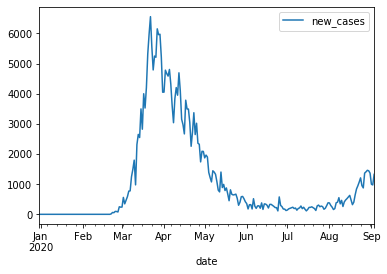

In [198]:
covid_df.plot('date','new_cases')

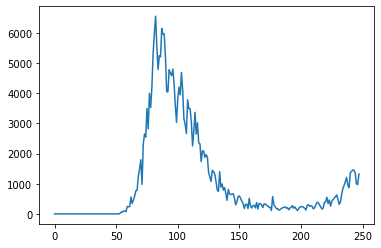

In [193]:
#Let's plot a line graph showing how the number of daily cases varies over time.


result_df.new_cases.plot()

While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. We can use the date column as the index for the data frame to address this issue.

In [194]:
result_df.set_index('date', inplace=True)


In [195]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403


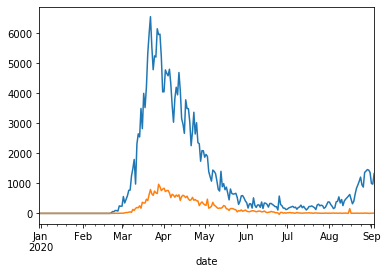

In [200]:
result_df.new_cases.plot()
result_df.new_deaths.plot()


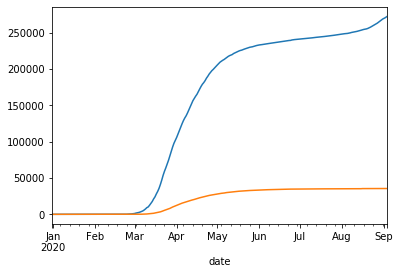

In [202]:
result_df.total_cases.plot()
result_df.total_deaths.plot()

In [211]:
death_rate = result_df.total_deaths/result_df.total_cases

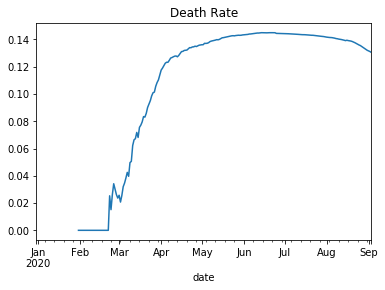

In [213]:
death_rate.plot(title = 'Death Rate')

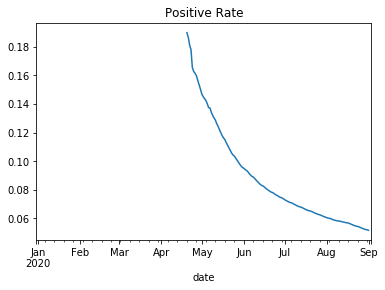

In [214]:
positive_rates = result_df.total_cases/result_df.total_tests
positive_rates.plot(title='Positive Rate')

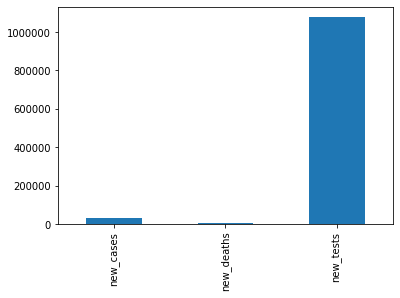

In [216]:
covid_may_totals.plot(kind='bar')

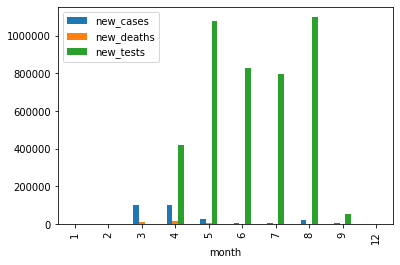

In [221]:
covid_month_df.plot(kind='bar')

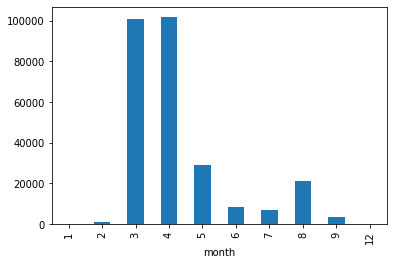

In [222]:
covid_month_df.new_cases.plot(kind='bar')